# African Elephant vs Kangaroo Dataset

Dataset Credits:
- kengeru > 2023-05-11 10:52pm
  - https://universe.roboflow.com/eliraz/kengeru
- elephant > 2024-04-14 12:36pm
  - https://universe.roboflow.com/wild-animal-detection-hyeyj/elephant-goq1m

Dataset can be accessed here: https://iitgnacin-my.sharepoint.com/:u:/g/personal/22110103_iitgn_ac_in/EXKmnNNBwlxKgDbtV6-mYGEBBTA9NR2R_jN4sNZwFmo0wQ?e=B6QZcI
## VGG 1

In [ ]:
import shutil
shutil.unpack_archive('/content/AfricanElephantvsKangaroo.zip', 'FinalDS')

In [ ]:
# Importing Necessary Libraries

import matplotlib.pyplot as plt
import numpy as np
import os
import time
import PIL
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
# Define input shape
input_shape = (640, 640, 3)
target_shape = (224, 224, 3)

# Define VGG model with one block
def create_vgg1_model():
    # Input layer
    inputs = Input(shape=input_shape)

    # Resize input to target shape
    resized_inputs = tf.image.resize(inputs, target_shape[:2])

    # Block 1
    x = Conv2D(64, (3, 3), activation='relu', padding='same')(resized_inputs)
    x = MaxPooling2D((2, 2))(x)

    # Flatten
    x = Flatten()(x)

    # Fully connected layer
    x = Dense(128, activation='relu')(x)

    # Output layer (binary classification)
    outputs = Dense(1, activation='sigmoid')(x)

    # Create model
    model = Model(inputs=inputs, outputs=outputs)
    return model

# Create the model
vgg_model_1_block = create_vgg1_model()

# Compile the model
vgg_model_1_block.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print model summary
vgg_model_1_block.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 640, 640, 3)]     0         
                                                                 
 tf.image.resize (TFOpLambd  (None, 224, 224, 3)       0         
 a)                                                              
                                                                 
 conv2d (Conv2D)             (None, 224, 224, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 112, 112, 64)      0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 802816)            0         
                                                                 
 dense (Dense)               (None, 128)               102760

In [ ]:
# Start Time
time_start = time.time()

# Set data directories
train_dir = '/content/FinalDS/AfricanElephantvsKangaroo/Train'
test_dir = '/content/FinalDS/AfricanElephantvsKangaroo/Test'

# Define data generators
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Load training data
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=target_shape[:2],
    batch_size=8,
    class_mode='binary'
)

# Load testing data
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=target_shape[:2],
    batch_size=8,
    class_mode='binary'
)

# Train the model
history = vgg_model_1_block.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=5,
    validation_data=test_generator,
    validation_steps=len(test_generator)
)

# End Time
time_end = time.time()

# Print time taken
print(f'Time taken: {time_end - time_start} seconds')

Found 160 images belonging to 2 classes.
Found 40 images belonging to 2 classes.
Epoch 1/5
20/20 [==============================] - 6s 58ms/step - loss: 11.8498 - accuracy: 0.5875 - val_loss: 1.4895 - val_accuracy: 0.6500
Epoch 2/5
20/20 [==============================] - 1s 48ms/step - loss: 0.2728 - accuracy: 0.8500 - val_loss: 0.4868 - val_accuracy: 0.7500
Epoch 3/5
20/20 [==============================] - 1s 48ms/step - loss: 0.0796 - accuracy: 0.9750 - val_loss: 0.5524 - val_accuracy: 0.6750
Epoch 4/5
20/20 [==============================] - 1s 52ms/step - loss: 0.0184 - accuracy: 1.0000 - val_loss: 0.7066 - val_accuracy: 0.6250
Epoch 5/5
20/20 [==============================] - 1s 48ms/step - loss: 0.0050 - accuracy: 1.0000 - val_loss: 0.5200 - val_accuracy: 0.7500
Time taken: 11.653235673904419 seconds


Text(0.5, 0, 'Epoch')

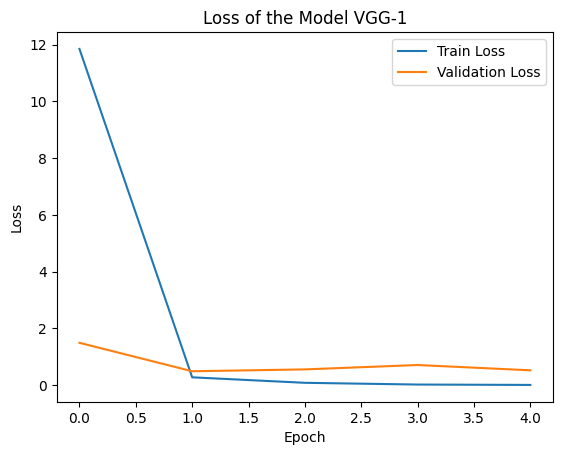

In [ ]:
# Plotting the Training and Validation Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(("Train Loss", "Validation Loss"))
plt.title('Loss of the Model VGG-1')
plt.ylabel('Loss')
plt.xlabel('Epoch')

Text(0.5, 0, 'Epoch')

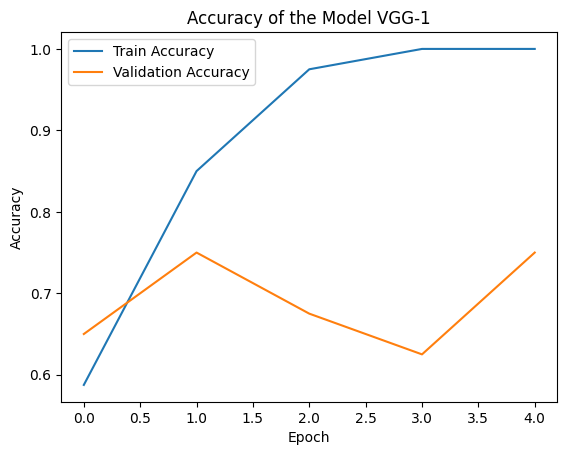

In [ ]:
# Plotting the Training and Validation Accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(("Train Accuracy", "Validation Accuracy"))
plt.title('Accuracy of the Model VGG-1')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')

In [ ]:
print("The Training Loss for the Model VGG 1")
for i in range(len(history.history['loss'])):
    print(f"Epoch {i+1}: {history.history['loss'][i]}")

print("The Validation Loss for the Model VGG 1")
for i in range(len(history.history['val_loss'])):
    print(f"Epoch {i+1}: {history.history['val_loss'][i]}")

print("The Training Accuracy for the Model VGG 1")
for i in range(len(history.history['accuracy'])):
    print(f"Epoch {i+1}: {history.history['accuracy'][i]}")

print("The Validation Accuracy for the Model VGG 1")
for i in range(len(history.history['val_accuracy'])):
    print(f"Epoch {i+1}: {history.history['val_accuracy'][i]}")

The Training Loss for the Model VGG 1
Epoch 1: 11.849771499633789
Epoch 2: 0.2728130519390106
Epoch 3: 0.0796416848897934
Epoch 4: 0.01837378367781639
Epoch 5: 0.005032895598560572
The Validation Loss for the Model VGG 1
Epoch 1: 1.489473581314087
Epoch 2: 0.48684900999069214
Epoch 3: 0.5524295568466187
Epoch 4: 0.7066450119018555
Epoch 5: 0.5199981927871704
The Training Accuracy for the Model VGG 1
Epoch 1: 0.5874999761581421
Epoch 2: 0.8500000238418579
Epoch 3: 0.9750000238418579
Epoch 4: 1.0
Epoch 5: 1.0
The Validation Accuracy for the Model VGG 1
Epoch 1: 0.6499999761581421
Epoch 2: 0.75
Epoch 3: 0.675000011920929
Epoch 4: 0.625
Epoch 5: 0.75


In [ ]:
# Evaluate the model on test data
test_loss, test_accuracy = vgg_model_1_block.evaluate(test_generator, steps=len(test_generator))
print(f"Test loss: {test_loss:.4f}, Test accuracy: {test_accuracy:.4f}")

5/5 [==============================] - 0s 27ms/step - loss: 0.5200 - accuracy: 0.7500
Test loss: 0.5200, Test accuracy: 0.7500


# VGG 3

In [ ]:
# Define input shape
input_shape = (640, 640, 3)
target_shape = (224, 224, 3)

# Define VGG model with three blocks
def create_vgg_model_3_blocks():
    # Input layer
    inputs = Input(shape=input_shape)

    # Resize input to target shape
    resized_inputs = tf.image.resize(inputs, target_shape[:2])

    # Block 1
    x = Conv2D(64, (3, 3), activation='relu', padding='same')(resized_inputs)
    x = MaxPooling2D((2, 2))(x)

    # Block 2
    x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = MaxPooling2D((2, 2))(x)

    # Block 3
    x = Conv2D(256, (3, 3), activation='relu', padding='same')(x)
    x = MaxPooling2D((2, 2))(x)

    # Flatten
    x = Flatten()(x)

    # Fully connected layer
    x = Dense(128, activation='relu')(x)

    # Output layer (binary classification)
    outputs = Dense(1, activation='sigmoid')(x)

    # Create model
    model = Model(inputs=inputs, outputs=outputs)
    return model

# Create the model with three blocks
vgg_model_3_blocks = create_vgg_model_3_blocks()

# Compile the model
vgg_model_3_blocks.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print model summary
vgg_model_3_blocks.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 640, 640, 3)]     0         
                                                                 
 tf.image.resize_1 (TFOpLam  (None, 224, 224, 3)       0         
 bda)                                                            
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 64)      1792      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 112, 112, 64)      0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 112, 112, 128)     73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 56, 56, 128)       0   

In [ ]:
# Start Time
time_start = time.time()

# Set data directories
train_dir = '/content/FinalDS/AfricanElephantvsKangaroo/Train'
test_dir = '/content/FinalDS/AfricanElephantvsKangaroo/Test'

# Define data generators
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Load training data
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=target_shape[:2],
    batch_size=8,
    class_mode='binary'
)

# Load testing data
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=target_shape[:2],
    batch_size=8,
    class_mode='binary'
)

# Train the model
history = vgg_model_3_blocks.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=5,
    validation_data=test_generator,
    validation_steps=len(test_generator)
)

# End Time
time_end = time.time()

# Print time taken
print(f'Time taken: {time_end - time_start} seconds')

Found 160 images belonging to 2 classes.
Found 40 images belonging to 2 classes.
Epoch 1/5
20/20 [==============================] - 4s 55ms/step - loss: 1.0034 - accuracy: 0.4812 - val_loss: 0.6930 - val_accuracy: 0.5000
Epoch 2/5
20/20 [==============================] - 1s 45ms/step - loss: 0.7154 - accuracy: 0.5500 - val_loss: 0.6559 - val_accuracy: 0.6500
Epoch 3/5
20/20 [==============================] - 1s 45ms/step - loss: 0.6370 - accuracy: 0.7188 - val_loss: 0.4995 - val_accuracy: 0.7500
Epoch 4/5
20/20 [==============================] - 1s 45ms/step - loss: 0.3507 - accuracy: 0.8562 - val_loss: 0.5053 - val_accuracy: 0.7000
Epoch 5/5
20/20 [==============================] - 1s 59ms/step - loss: 0.1447 - accuracy: 0.9500 - val_loss: 1.0708 - val_accuracy: 0.6250
Time taken: 8.781548023223877 seconds


Text(0.5, 0, 'Epoch')

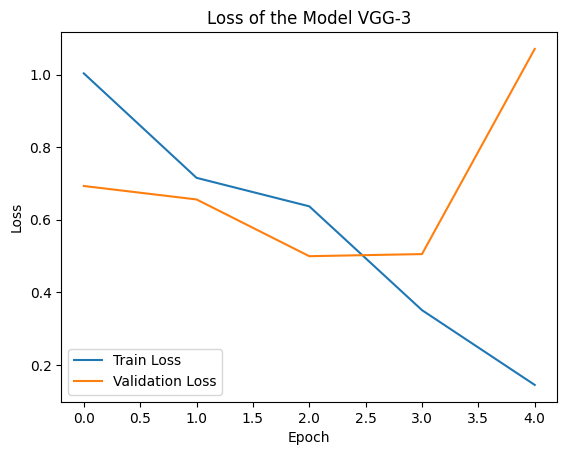

In [ ]:
# Plotting the Training and Validation Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(("Train Loss", "Validation Loss"))
plt.title('Loss of the Model VGG-3')
plt.ylabel('Loss')
plt.xlabel('Epoch')

Text(0.5, 0, 'Epoch')

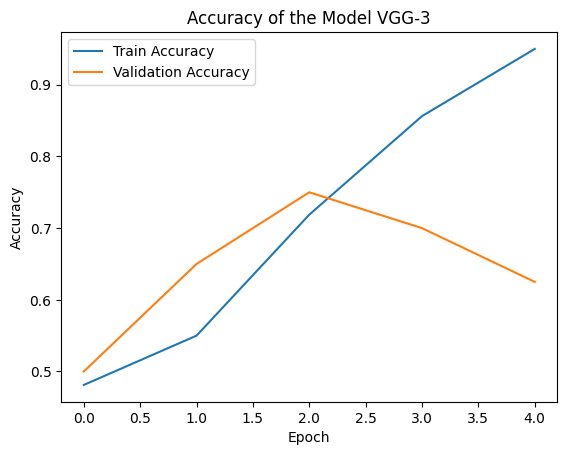

In [ ]:
# Plotting the Training and Validation Accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(("Train Accuracy", "Validation Accuracy"))
plt.title('Accuracy of the Model VGG-3')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')

In [ ]:
print("The Training Loss for the Model VGG 3")
for i in range(len(history.history['loss'])):
    print(f"Epoch {i+1}: {history.history['loss'][i]}")

print("The Validation Loss for the Model VGG 3")
for i in range(len(history.history['val_loss'])):
    print(f"Epoch {i+1}: {history.history['val_loss'][i]}")

print("The Training Accuracy for the Model VGG 3")
for i in range(len(history.history['accuracy'])):
    print(f"Epoch {i+1}: {history.history['accuracy'][i]}")

print("The Validation Accuracy for the Model VGG 3")
for i in range(len(history.history['val_accuracy'])):
    print(f"Epoch {i+1}: {history.history['val_accuracy'][i]}")

The Training Loss for the Model VGG 3
Epoch 1: 1.003382921218872
Epoch 2: 0.7154399156570435
Epoch 3: 0.6369556784629822
Epoch 4: 0.35074323415756226
Epoch 5: 0.14467549324035645
The Validation Loss for the Model VGG 3
Epoch 1: 0.6929868459701538
Epoch 2: 0.6558862924575806
Epoch 3: 0.4994799494743347
Epoch 4: 0.5053096413612366
Epoch 5: 1.0707871913909912
The Training Accuracy for the Model VGG 3
Epoch 1: 0.48124998807907104
Epoch 2: 0.550000011920929
Epoch 3: 0.71875
Epoch 4: 0.856249988079071
Epoch 5: 0.949999988079071
The Validation Accuracy for the Model VGG 3
Epoch 1: 0.5
Epoch 2: 0.6499999761581421
Epoch 3: 0.75
Epoch 4: 0.699999988079071
Epoch 5: 0.625


In [ ]:
# Evaluate the model on test data
test_loss, test_accuracy = vgg_model_3_blocks.evaluate(test_generator, steps=len(test_generator))
print(f"Test loss: {test_loss:.4f}, Test accuracy: {test_accuracy:.4f}")

5/5 [==============================] - 0s 37ms/step - loss: 1.0708 - accuracy: 0.6250
Test loss: 1.0708, Test accuracy: 0.6250


## Same VGG 3 Model with Data Augmentation

Data Augmented with:

  - rotation_range=90
  - width_shift_range=0.75
  - height_shift_range=0.75
  - shear_range=0.95
  - zoom_range=0.3
  - horizontal_flip=True
  - channel_shift_range=0.6
  - fill_mode='nearest'


In [ ]:
# Start Time
time_start = time.time()

# Set data directories
train_dir = '/content/FinalDS/AfricanElephantvsKangaroo/Train'
test_dir = '/content/FinalDS/AfricanElephantvsKangaroo/Test'

# Define data augmentation for training data
train_datagen_augmented = ImageDataGenerator(
    rescale=1./255,
    rotation_range=90,
    width_shift_range=0.75,
    height_shift_range=0.75,
    shear_range=0.95,
    zoom_range=0.3,
    horizontal_flip=True,
    channel_shift_range=0.6,
    fill_mode='nearest'
)

# Define data generator for testing data (no augmentation)
test_datagen = ImageDataGenerator(rescale=1./255)

# Load augmented training data
train_generator_augmented = train_datagen_augmented.flow_from_directory(
    train_dir,
    target_size=target_shape[:2],
    batch_size=8,
    class_mode='binary'
)

# Load testing data
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=target_shape[:2],
    batch_size=8,
    class_mode='binary'
)

# Train the model with augmented data
history_augmented = vgg_model_3_blocks.fit(
    train_generator_augmented,
    steps_per_epoch=len(train_generator_augmented),
    epochs=5,
    validation_data=test_generator,
    validation_steps=len(test_generator)
)


Found 160 images belonging to 2 classes.
Found 40 images belonging to 2 classes.
Epoch 1/5
20/20 [==============================] - 4s 205ms/step - loss: 0.9327 - accuracy: 0.5375 - val_loss: 0.6508 - val_accuracy: 0.6500
Epoch 2/5
20/20 [==============================] - 3s 139ms/step - loss: 0.7007 - accuracy: 0.4812 - val_loss: 0.6729 - val_accuracy: 0.5000
Epoch 3/5
20/20 [==============================] - 3s 138ms/step - loss: 0.6900 - accuracy: 0.5000 - val_loss: 0.6556 - val_accuracy: 0.7000
Epoch 4/5
20/20 [==============================] - 3s 155ms/step - loss: 0.6929 - accuracy: 0.4187 - val_loss: 0.6489 - val_accuracy: 0.6500
Epoch 5/5
20/20 [==============================] - 3s 165ms/step - loss: 0.6833 - accuracy: 0.4938 - val_loss: 0.6646 - val_accuracy: 0.5750


Text(0.5, 0, 'Epoch')

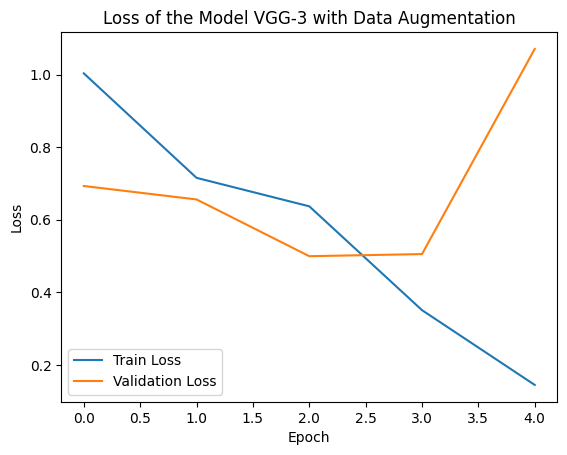

In [ ]:
# Plotting the Training and Validation Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(("Train Loss", "Validation Loss"))
plt.title('Loss of the Model VGG-3 with Data Augmentation')
plt.ylabel('Loss')
plt.xlabel('Epoch')

Text(0.5, 0, 'Epoch')

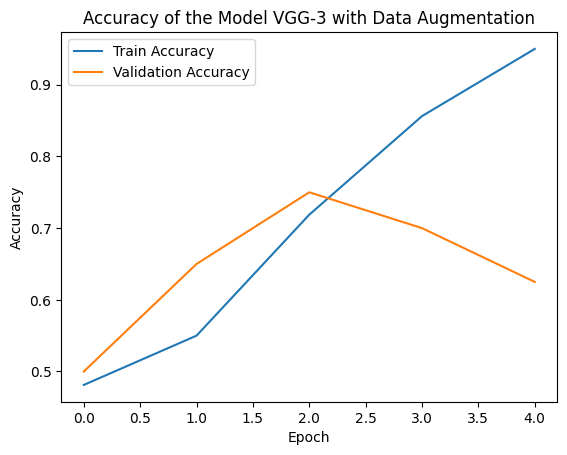

In [ ]:
# Plotting the Training and Validation Accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(("Train Accuracy", "Validation Accuracy"))
plt.title('Accuracy of the Model VGG-3 with Data Augmentation')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')

In [ ]:
print("The Training Loss for the Model VGG 3 with Data Augmentation")
for i in range(len(history.history['loss'])):
    print(f"Epoch {i+1}: {history.history['loss'][i]}")

print("The Validation Loss for the Model VGG 3 with Data Augmentation")
for i in range(len(history.history['val_loss'])):
    print(f"Epoch {i+1}: {history.history['val_loss'][i]}")

print("The Training Accuracy for the Model VGG 3 with Data Augmentation")
for i in range(len(history.history['accuracy'])):
    print(f"Epoch {i+1}: {history.history['accuracy'][i]}")

print("The Validation Accuracy for the Model VGG 3 with Data Augmentation")
for i in range(len(history.history['val_accuracy'])):
    print(f"Epoch {i+1}: {history.history['val_accuracy'][i]}")

The Training Loss for the Model VGG 3 with Data Augmentation
Epoch 1: 1.003382921218872
Epoch 2: 0.7154399156570435
Epoch 3: 0.6369556784629822
Epoch 4: 0.35074323415756226
Epoch 5: 0.14467549324035645
The Validation Loss for the Model VGG 3 with Data Augmentation
Epoch 1: 0.6929868459701538
Epoch 2: 0.6558862924575806
Epoch 3: 0.4994799494743347
Epoch 4: 0.5053096413612366
Epoch 5: 1.0707871913909912
The Training Accuracy for the Model VGG 3 with Data Augmentation
Epoch 1: 0.48124998807907104
Epoch 2: 0.550000011920929
Epoch 3: 0.71875
Epoch 4: 0.856249988079071
Epoch 5: 0.949999988079071
The Validation Accuracy for the Model VGG 3 with Data Augmentation
Epoch 1: 0.5
Epoch 2: 0.6499999761581421
Epoch 3: 0.75
Epoch 4: 0.699999988079071
Epoch 5: 0.625


In [ ]:
# Evaluate the model on test data
test_loss, test_accuracy = vgg_model_3_blocks.evaluate(test_generator, steps=len(test_generator))
print(f"Test loss: {test_loss:.4f}, Test accuracy: {test_accuracy:.4f}")

5/5 [==============================] - 0s 29ms/step - loss: 0.6646 - accuracy: 0.5750
Test loss: 0.6646, Test accuracy: 0.5750


## VGG 16 with all layers trained

In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential

# Define input shape
input_shape = (640, 640, 3)
target_shape = (224, 224, 3)

# Define VGG 16
def create_vgg_16():
    # Input layer
    inputs = Input(shape=input_shape)

    # Resize input to target shape
    resized_inputs = tf.image.resize(inputs, target_shape[:2])

    # Block 1
    x = Conv2D(64, (3, 3), activation='relu', padding='same')(resized_inputs)
    x = Conv2D(64, (3, 3), activation='relu', padding='same')(resized_inputs)
    x = MaxPooling2D((2, 2))(x)

    # Block 2
    x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = MaxPooling2D((2, 2))(x)

    # Block 3
    x = Conv2D(256, (3, 3), activation='relu', padding='same')(x)
    x = Conv2D(256, (3, 3), activation='relu', padding='same')(x)
    x = MaxPooling2D((2, 2))(x)

    # Block 4
    x = Conv2D(512, (3, 3), activation='relu', padding='same')(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same')(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same')(x)
    x = MaxPooling2D((2, 2))(x)

    # Block 5
    x = Conv2D(512, (3, 3), activation='relu', padding='same')(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same')(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same')(x)
    x = MaxPooling2D((2, 2))(x)

    # Flatten
    x = Flatten()(x)

    # Fully connected layer
    x = Dense(4096, activation='relu')(x)
    x = Dense(128, activation='relu')(x)

    # Output layer (binary classification)
    outputs = Dense(1, activation='softmax')(x)

    # Create model
    model = Model(inputs=inputs, outputs=outputs)
    return model

# Create the model with three blocks
vgg16_model= create_vgg_16()

# Compile the model
vgg16_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print model summary
vgg16_model.summary()



Model: "model_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, 640, 640, 3)]     0         
                                                                 
 tf.image.resize_7 (TFOpLam  (None, 224, 224, 3)       0         
 bda)                                                            
                                                                 
 conv2d_78 (Conv2D)          (None, 224, 224, 64)      1792      
                                                                 
 max_pooling2d_33 (MaxPooli  (None, 112, 112, 64)      0         
 ng2D)                                                           
                                                                 
 conv2d_79 (Conv2D)          (None, 112, 112, 128)     73856     
                                                                 
 conv2d_80 (Conv2D)          (None, 112, 112, 128)     1475

In [ ]:
# Start Time
time_start = time.time()

# Set data directories
train_dir = '/content/FinalDS/AfricanElephantvsKangaroo/Train'
test_dir = '/content/FinalDS/AfricanElephantvsKangaroo/Test'

# Define data generators
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Load training data
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=target_shape[:2],
    batch_size=8,
    class_mode='binary'
)

# Load testing data
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=target_shape[:2],
    batch_size=8,
    class_mode='binary'
)

# Train the model
history = vgg16_model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=5,
    validation_data=test_generator,
    validation_steps=len(test_generator)
)

# End Time
time_end = time.time()

# Print time taken
print(f'Time taken: {time_end - time_start} seconds')

Found 160 images belonging to 2 classes.
Found 40 images belonging to 2 classes.
Epoch 1/5
20/20 [==============================] - 9s 166ms/step - loss: 0.7895 - accuracy: 0.5000 - val_loss: 0.6933 - val_accuracy: 0.5000
Epoch 2/5
20/20 [==============================] - 3s 150ms/step - loss: 0.6939 - accuracy: 0.5000 - val_loss: 0.6934 - val_accuracy: 0.5000
Epoch 3/5
20/20 [==============================] - 3s 155ms/step - loss: 0.6937 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
20/20 [==============================] - 3s 151ms/step - loss: 0.6937 - accuracy: 0.5000 - val_loss: 0.6933 - val_accuracy: 0.5000
Epoch 5/5
20/20 [==============================] - 3s 150ms/step - loss: 0.6940 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Time taken: 28.03740119934082 seconds


Text(0.5, 0, 'Epoch')

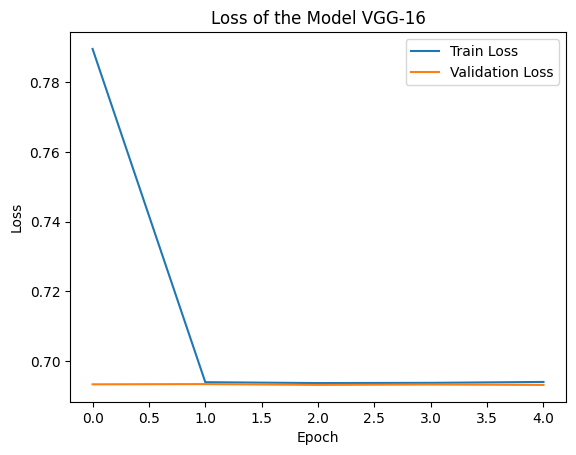

In [ ]:
# Plotting the Training and Validation Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(("Train Loss", "Validation Loss"))
plt.title('Loss of the Model VGG-16')
plt.ylabel('Loss')
plt.xlabel('Epoch')

Text(0.5, 0, 'Epoch')

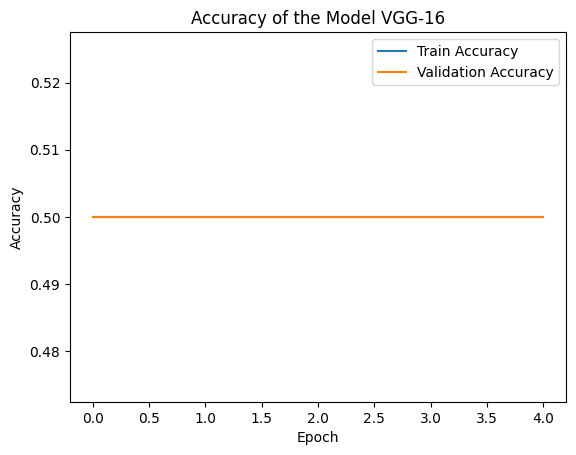

In [ ]:
# Plotting the Training and Validation Accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(("Train Accuracy", "Validation Accuracy"))
plt.title('Accuracy of the Model VGG-16')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')

In [ ]:
print("The Training Loss for the Model VGG 16")
for i in range(len(history.history['loss'])):
    print(f"Epoch {i+1}: {history.history['loss'][i]}")

print("The Validation Loss for the Model VGG 16")
for i in range(len(history.history['val_loss'])):
    print(f"Epoch {i+1}: {history.history['val_loss'][i]}")

print("The Training Accuracy for the Model VGG 16")
for i in range(len(history.history['accuracy'])):
    print(f"Epoch {i+1}: {history.history['accuracy'][i]}")

print("The Validation Accuracy for the Model VGG 16")
for i in range(len(history.history['val_accuracy'])):
    print(f"Epoch {i+1}: {history.history['val_accuracy'][i]}")

The Training Loss for the Model VGG 16
Epoch 1: 0.7895468473434448
Epoch 2: 0.6939271688461304
Epoch 3: 0.6936794519424438
Epoch 4: 0.6937445998191833
Epoch 5: 0.6940017938613892
The Validation Loss for the Model VGG 16
Epoch 1: 0.6933218240737915
Epoch 2: 0.6933874487876892
Epoch 3: 0.6931549906730652
Epoch 4: 0.693271815776825
Epoch 5: 0.6931476593017578
The Training Accuracy for the Model VGG 16
Epoch 1: 0.5
Epoch 2: 0.5
Epoch 3: 0.5
Epoch 4: 0.5
Epoch 5: 0.5
The Validation Accuracy for the Model VGG 16
Epoch 1: 0.5
Epoch 2: 0.5
Epoch 3: 0.5
Epoch 4: 0.5
Epoch 5: 0.5


In [ ]:
# Evaluate the model on test data
test_loss, test_accuracy = vgg16_model.evaluate(test_generator, steps=len(test_generator))
print(f"Test loss: {test_loss:.4f}, Test accuracy: {test_accuracy:.4f}")

5/5 [==============================] - 0s 67ms/step - loss: 0.6931 - accuracy: 0.5000
Test loss: 0.6931, Test accuracy: 0.5000


## Transfer learning using VGG16 with tuning only final MLP layers

In [ ]:
def create_transfer_model(input_shape, num_classes):

    # Load pre-trained VGG-16 model (excluding top layers)
    base_model = VGG16(weights='imagenet', include_top=False, input_shape=input_shape)

    # Freeze convolutional layers
    for layer in base_model.layers:
        layer.trainable = False

    # Add custom MLP layers on top
    x = base_model.output
    x = Flatten()(x)
    x = Dense(4096, activation='relu')(x)
    x = Dense(4096, activation='relu')(x)
    predictions = Dense(num_classes, activation='sigmoid')(x)

    # Create transfer learning model
    transfer_model = Model(inputs=base_model.input, outputs=predictions)
    return transfer_model

input_shape = (224, 224, 3)
num_classes = 1  # Binary classification
transfer_model = create_transfer_model(input_shape, num_classes)

# Compile the model
transfer_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
transfer_model.summary()


58889256/58889256 [==============================] - 4s 0us/step
Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                            

In [ ]:
# Start Time
time_start = time.time()

# Set data directories
train_dir = '/content/FinalDS/AfricanElephantvsKangaroo/Train'
test_dir = '/content/FinalDS/AfricanElephantvsKangaroo/Test'

# Define data generators
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Load training data
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=target_shape[:2],
    batch_size=8,
    class_mode='binary'
)

# Load testing data
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=target_shape[:2],
    batch_size=8,
    class_mode='binary'
)

# Train the model
history = transfer_model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=5,
    validation_data=test_generator,
    validation_steps=len(test_generator)
)

# End Time
time_end = time.time()

# Print time taken
print(f'Time taken: {time_end - time_start} seconds')

Found 160 images belonging to 2 classes.
Found 40 images belonging to 2 classes.
Epoch 1/5
20/20 [==============================] - 5s 108ms/step - loss: 6.7176 - accuracy: 0.6375 - val_loss: 0.0665 - val_accuracy: 1.0000
Epoch 2/5
20/20 [==============================] - 2s 96ms/step - loss: 0.0761 - accuracy: 0.9563 - val_loss: 0.0138 - val_accuracy: 1.0000
Epoch 3/5
20/20 [==============================] - 2s 115ms/step - loss: 0.0210 - accuracy: 0.9875 - val_loss: 0.0034 - val_accuracy: 1.0000
Epoch 4/5
20/20 [==============================] - 2s 97ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.0138 - val_accuracy: 1.0000
Epoch 5/5
20/20 [==============================] - 2s 97ms/step - loss: 3.3913e-05 - accuracy: 1.0000 - val_loss: 0.0168 - val_accuracy: 1.0000
Time taken: 14.052172660827637 seconds


Text(0.5, 0, 'Epoch')

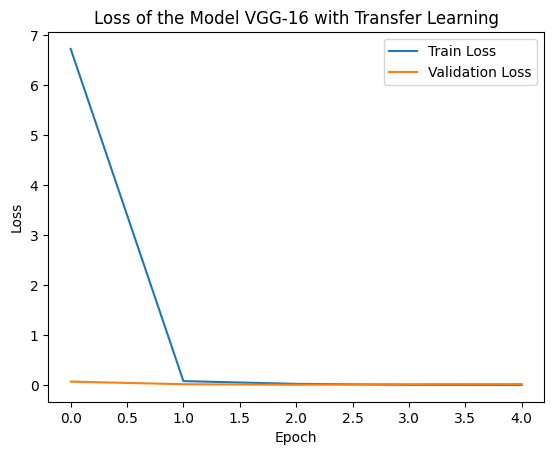

In [ ]:
# Plotting the Training and Validation Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(("Train Loss", "Validation Loss"))
plt.title('Loss of the Model VGG-16 with Transfer Learning')
plt.ylabel('Loss')
plt.xlabel('Epoch')

Text(0.5, 0, 'Epoch')

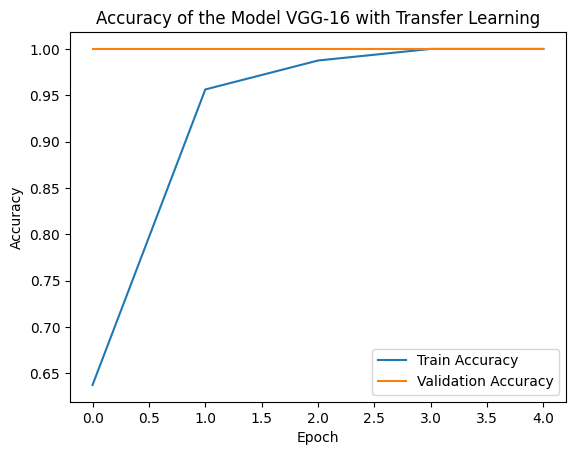

In [ ]:
# Plotting the Training and Validation Accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(("Train Accuracy", "Validation Accuracy"))
plt.title('Accuracy of the Model VGG-16 with Transfer Learning')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')

In [ ]:
print("The Training Loss for the Model VGG 16 with Transfer Learning")
for i in range(len(history.history['loss'])):
    print(f"Epoch {i+1}: {history.history['loss'][i]}")

print("The Validation Loss for the Model VGG 16 with Transfer Learning")
for i in range(len(history.history['val_loss'])):
    print(f"Epoch {i+1}: {history.history['val_loss'][i]}")

print("The Training Accuracy for the Model VGG 16 with Transfer Learning")
for i in range(len(history.history['accuracy'])):
    print(f"Epoch {i+1}: {history.history['accuracy'][i]}")

print("The Validation Accuracy for the Model VGG 16 with Transfer Learning")
for i in range(len(history.history['val_accuracy'])):
    print(f"Epoch {i+1}: {history.history['val_accuracy'][i]}")

The Training Loss for the Model VGG 16 with Transfer Learning
Epoch 1: 6.717604160308838
Epoch 2: 0.0761021226644516
Epoch 3: 0.02104470506310463
Epoch 4: 0.0018225995590910316
Epoch 5: 3.391283462406136e-05
The Validation Loss for the Model VGG 16 with Transfer Learning
Epoch 1: 0.0665348544716835
Epoch 2: 0.013818381354212761
Epoch 3: 0.003377536777406931
Epoch 4: 0.013808578252792358
Epoch 5: 0.01683046668767929
The Training Accuracy for the Model VGG 16 with Transfer Learning
Epoch 1: 0.637499988079071
Epoch 2: 0.956250011920929
Epoch 3: 0.987500011920929
Epoch 4: 1.0
Epoch 5: 1.0
The Validation Accuracy for the Model VGG 16 with Transfer Learning
Epoch 1: 1.0
Epoch 2: 1.0
Epoch 3: 1.0
Epoch 4: 1.0
Epoch 5: 1.0


In [ ]:
# Evaluate the model on test data
test_loss, test_accuracy = transfer_model.evaluate(test_generator, steps=len(test_generator))
print(f"Test loss: {test_loss:.4f}, Test accuracy: {test_accuracy:.4f}")

5/5 [==============================] - 0s 58ms/step - loss: 0.0168 - accuracy: 1.0000
Test loss: 0.0168, Test accuracy: 1.0000


In [ ]:
transfer_model.predict(test_generator)

5/5 [==============================] - 1s 70ms/step


array([[1.4875333e-08],
       [5.6511158e-08],
       [1.4905744e-09],
       [7.2164428e-01],
       [9.9988902e-01],
       [9.9998736e-01],
       [9.0223487e-08],
       [2.7425834e-10],
       [5.2342473e-09],
       [1.0000000e+00],
       [1.3161407e-08],
       [3.6969412e-09],
       [5.1992846e-04],
       [9.9999809e-01],
       [9.9999952e-01],
       [1.0000000e+00],
       [6.1924425e-07],
       [3.5274134e-11],
       [2.9937556e-08],
       [1.5822954e-04],
       [2.5475695e-06],
       [1.8741458e-11],
       [9.9047244e-01],
       [9.9996543e-01],
       [9.9980217e-01],
       [9.9999809e-01],
       [9.9996543e-01],
       [9.9988902e-01],
       [1.0000000e+00],
       [9.9980217e-01],
       [6.1005303e-06],
       [7.2164428e-01],
       [1.0000000e+00],
       [6.0312443e-11],
       [2.2933312e-08],
       [9.9047244e-01],
       [5.4205002e-10],
       [9.9977821e-01],
       [3.4803620e-09],
       [9.9998736e-01]], dtype=float32)